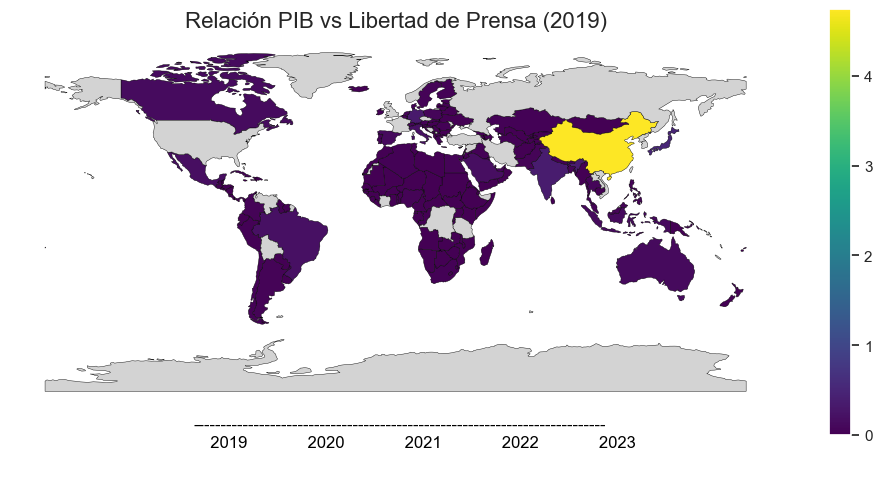

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pycountry

# Cargar tus datos
df = pd.read_csv("Prensa_Ingreso.csv")

def get_iso_code(country_name):
    try:
        return pycountry.countries.get(name=country_name).alpha_3
    except:
        return None

df["ISO"] = df["Country"].apply(get_iso_code)

# 2. Cargar shapefile desde tu computadora
world = gpd.read_file("ne_data/ne_110m_admin_0_countries.shp")  # Ruta al archivo descargado

# 3. Fusionar datos con el mapa
merged_data = world.merge(df, how="left", left_on="ISO_A3", right_on="ISO")

# 4. Crear métrica combinada (ejemplo)
merged_data["Metrica"] = (merged_data["2019_total_gdp"] / merged_data["2019_total_gdp"].max()) * (100 / merged_data["2019_Score"])

# 5. Configurar el mapa
fig, ax = plt.subplots(figsize=(10, 5))
merged_data.plot(
    column="Metrica",
    cmap="viridis",
    edgecolor="black",
    linewidth=0.3,
    legend=True,
    ax=ax,
    missing_kwds={"color": "lightgrey"}
)

#Añadir barra de tiempo simulada
plt.annotate(
    """---------------------------------------------------------------------------
          2019             2020             2021             2022             2023
    """,
    xy=(0.4, 0.04),
    xycoords="figure fraction",
    ha="center",
    color="black",
    fontsize=12,
    weight="normal"
)

#Ajustes finales
plt.title("Relación PIB vs Libertad de Prensa (2019)", fontsize=16)
plt.axis("off")
plt.tight_layout()
plt.show()

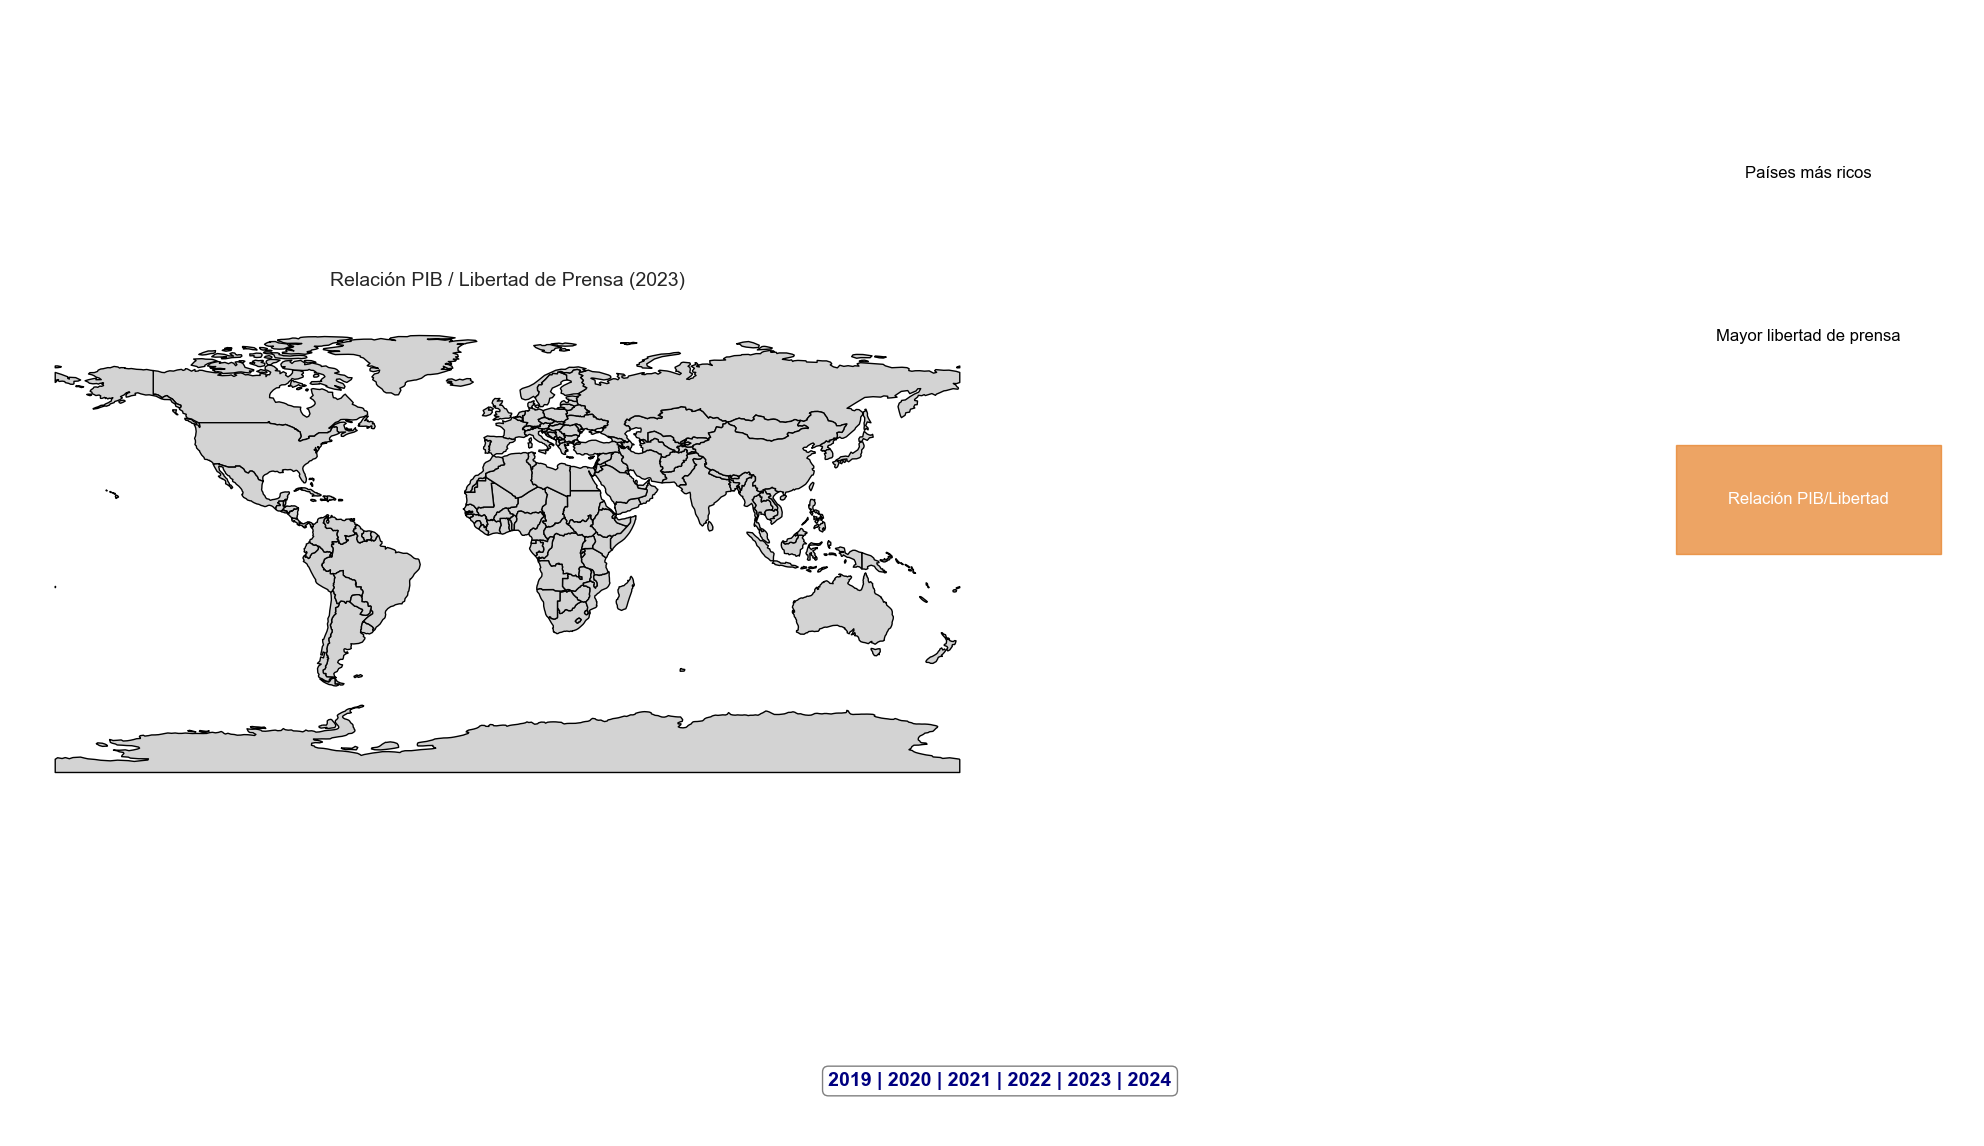

In [234]:
import matplotlib.pyplot as plt
import geopandas as gpd

# ------------------------------------------------------
# 1. Configurar el layout del gráfico
# ------------------------------------------------------
fig = plt.figure(figsize=(20, 12))
grid = plt.GridSpec(1, 2, width_ratios=[3, 1])  # 3:1 para mapa vs panel

# ------------------------------------------------------
# 2. Mapa de la relación (izquierda)
# ------------------------------------------------------
ax_map = plt.subplot(grid[0])

# (Aquí iría tu código para generar el mapa de la relación PIB/Libertad)
# Ejemplo simplificado:
world = gpd.read_file("ne_data/ne_110m_admin_0_countries.shp")
world.plot(ax=ax_map, color="lightgrey", edgecolor="black")
ax_map.set_title("Relación PIB / Libertad de Prensa (2023)", fontsize=14, pad=20)
ax_map.axis("off")

# ------------------------------------------------------
# 3. Panel de opciones simuladas (derecha)
# ------------------------------------------------------
ax_panel = plt.subplot(grid[1])
ax_panel.axis("off")  # Ocultar ejes

# Simular botones de selección
options = {
    "Países más ricos": {"color": "#3498db", "selected": False},
    "Mayor libertad de prensa": {"color": "#2ecc71", "selected": False},
    "Relación PIB/Libertad": {"color": "#e67e22", "selected": True}  # Seleccionado
}

y_position = 0.8  # Posición inicial vertical
for option, config in options.items():
    bg_color = config["color"] if config["selected"] else "white"
    text_color = "white" if config["selected"] else "black"
    
    # Dibujar "botón"
    ax_panel.add_patch(plt.Rectangle((0.1, y_position), 0.8, 0.1, 
                      color=bg_color, transform=ax_panel.transAxes, alpha=0.7))
    # Texto del botón
    ax_panel.text(0.5, y_position + 0.05, option, 
                ha="center", va="center", color=text_color,
                fontsize=12, transform=ax_panel.transAxes)
    
    y_position -= 0.15  # Espacio entre botones

# ------------------------------------------------------
# 4. Barra de tiempo simulada (inferior)
# ------------------------------------------------------
plt.annotate("2019 | 2020 | 2021 | 2022 | 2023 | 2024", 
             xy=(0.5, 0.05), 
             xycoords="figure fraction",
             ha="center", 
             color="navy", 
             fontsize=14,
             weight="bold",
             bbox=dict(facecolor="white", edgecolor="gray", boxstyle="round"))

plt.tight_layout()
plt.show()

177
215


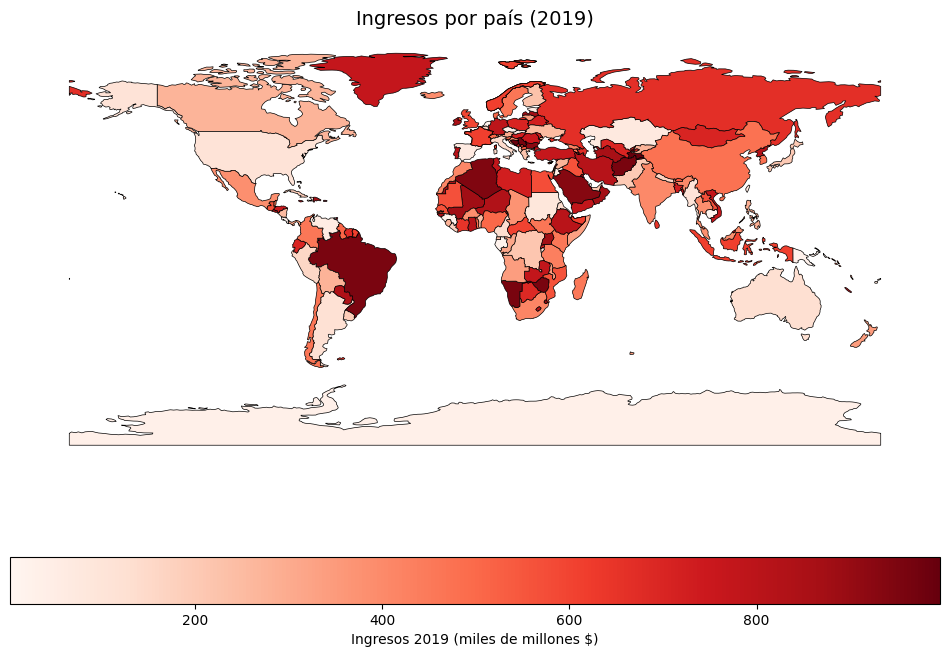

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np

world = gpd.read_file("ne_data/ne_110m_admin_0_countries.shp")
df_income = pd.read_csv("data limpia\\Countries_GDP_CLEEN.csv")

countries = world['ISO_A3'].tolist()
income = df_income['2019_total_gdp'].tolist()
print(len(countries))
print(len(income))
np.random.seed(42)
income = pd.DataFrame({
    'ISO_A3': countries,
    'income_2019': income,
})

world_income = world.merge(income, on='ISO_A3', how='right')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
world_income.plot(column='income_2019', cmap='Reds', linewidth=0.5, ax=ax, edgecolor='black', legend=True,
                  legend_kwds={'label': "Ingresos 2019 (miles de millones $)", 'orientation': "horizontal"})
ax.set_title('Ingresos por país (2019)', fontsize=14)
ax.axis('off')

plt.show()


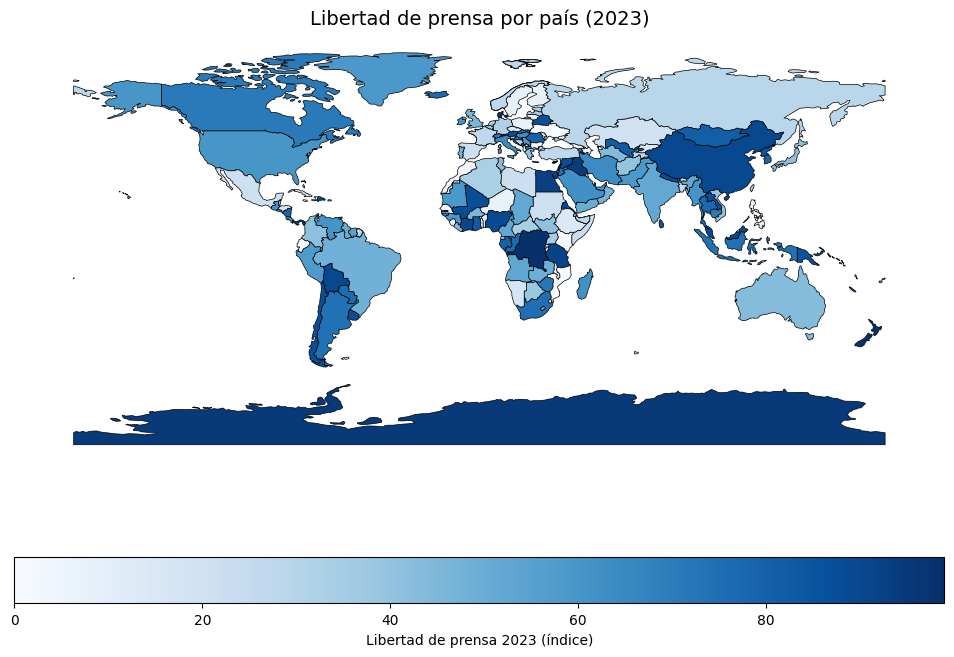

In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np

world = gpd.read_file("ne_data/ne_110m_admin_0_countries.shp")
df_press = pd.read_csv("data limpia\\Free_Press_CLEEN.csv")

# Datos ficticios
countries = world['ISO_A3'].tolist()
np.random.seed(42)
press_freedom = pd.DataFrame({
    'ISO_A3': countries,
    'press_2023': np.random.randint(0, 100, size=len(countries)),
})

world_press = world.merge(press_freedom, on='ISO_A3', how='left')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
world_press.plot(column='press_2023', cmap='Blues', linewidth=0.5, ax=ax, edgecolor='black', legend=True,
                 legend_kwds={'label': "Libertad de prensa 2023 (índice)", 'orientation': "horizontal"})
ax.set_title('Libertad de prensa por país (2023)', fontsize=14)
ax.axis('off')

plt.show()
